In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; 
sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [2]:
store_visits = pd.read_csv('datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
385,465.021411,716.695567,0
102,1004.773715,5047.868573,1
76,938.960403,4701.802013,1
119,1003.888556,5065.442778,1
190,1069.854028,5418.270141,1
107,1065.176085,5365.880426,1
3,952.360965,4849.804826,1
162,1008.177255,5135.886276,1
10,1167.081560,5882.407798,1
182,865.548741,4367.743705,1


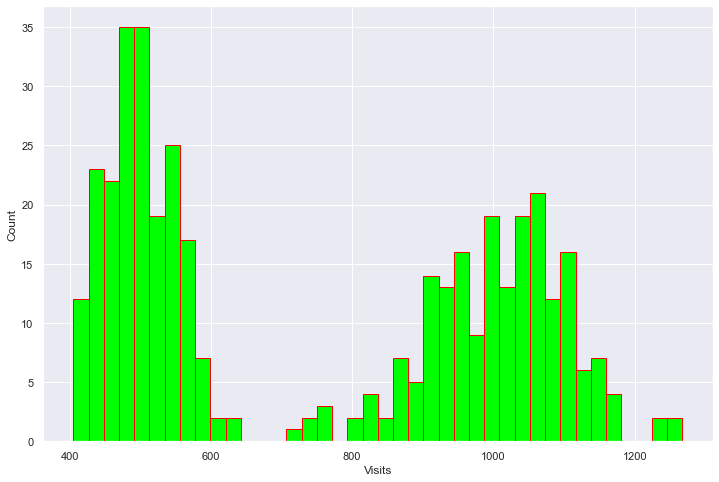

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], 
         facecolor='lime', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

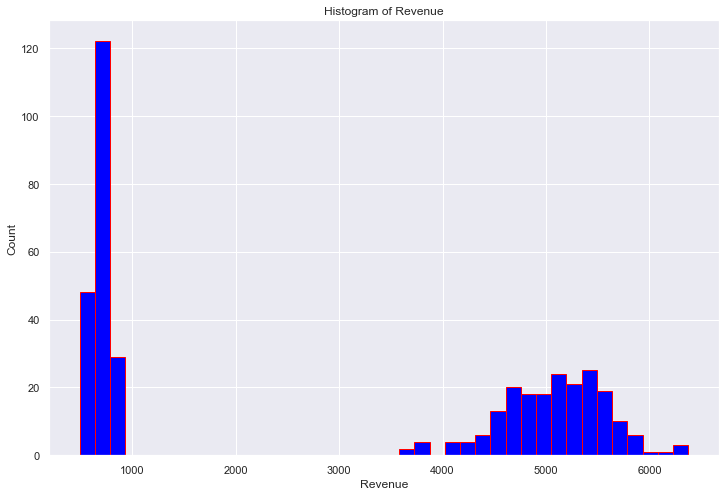

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], 
         facecolor='blue', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [5]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=200)

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [6]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [7]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069491,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


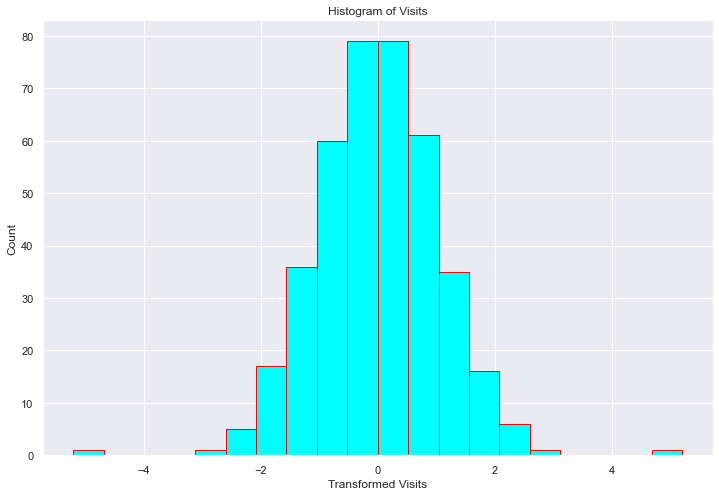

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], 
         facecolor='cyan', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

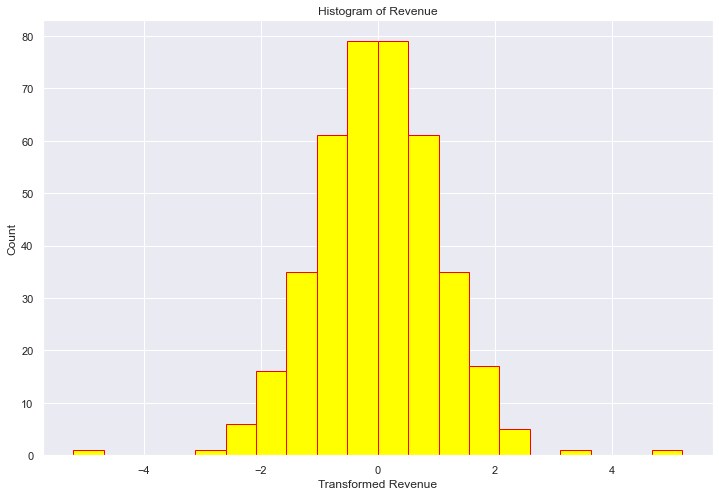

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], 
         facecolor='yellow', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

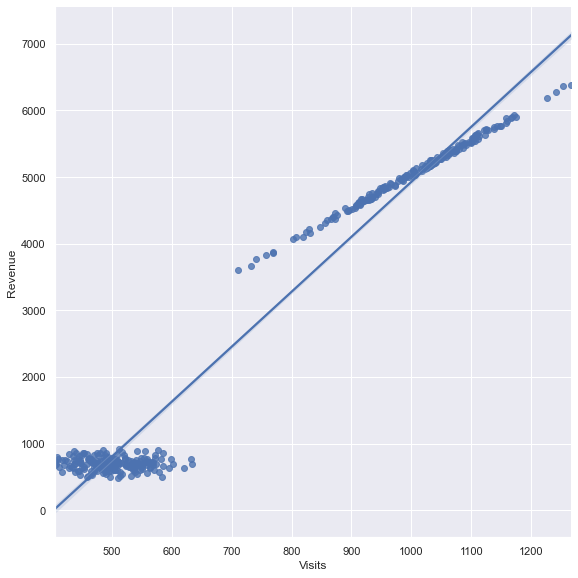

In [10]:
sns.lmplot(x="Visits", 
           y="Revenue", 
           data=final_df, 
           height=8)

plt.show()

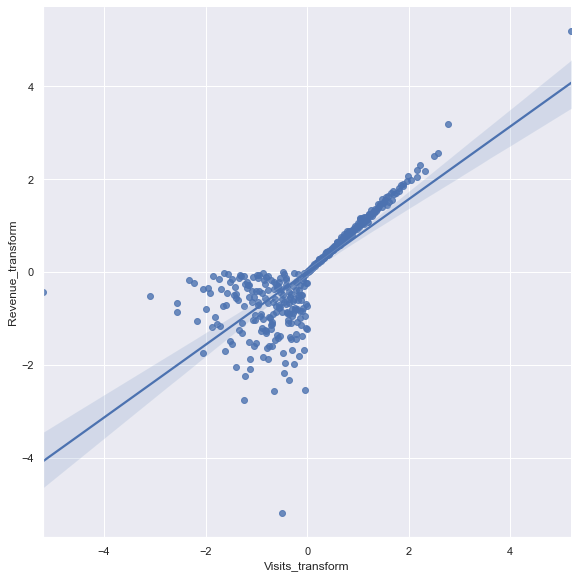

In [11]:
g = sns.lmplot(x="Visits_transform", 
               y="Revenue_transform", 
               data=final_df, 
               height=8)

plt.show()